### IMPORT ALL PACKAGES

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [96]:
#LOAD DATASET INTO WORKSHEET
cars_df = pd.read_csv('final_cars_data.csv')

In [97]:
#DISPLAY LAST 5 VALUES OF THE DATASET
cars_df.tail()

,car_name,model,Mileage,Year,Condition,Price
10204,Seat,Cordoba,279649.0,1999,Foreign Used,1275000
10205,Cadillac,Escalade,21308.0,2011,Nigerian Used,4520000
10206,Toyota,Land,48502.0,2010,Nigerian Used,9210000
10207,Mercedes-Benz,Slk350,80497.0,2005,Nigerian Used,3001250
10208,Mitsubishi,Pajero,124776.0,2012,Nigerian Used,3957500


In [98]:
#SHAPE OF DATASET
cars_df.shape

(10209, 6)

In [99]:
#DSPLAY ALL COLUMNS
cars_df.columns

Index(['car_name', 'model', 'Mileage', 'Year', 'Condition', 'Price'], dtype='object')

In [100]:
#DISPLAY THE TOP 5 ROWS IN THE DATASET
cars_df.head()

,car_name,model,Mileage,Year,Condition,Price
0,Lexus,LX,21204.0,2018,Foreign Used,50015000
1,Toyota,Camry,140309.0,2013,Foreign Used,5015000
2,Toyota,Venza,172709.0,2013,Foreign Used,7115000
3,Mercedes-Benz,C,114936.0,2010,Foreign Used,4815000
4,Toyota,Lexus,123938.5,2012,Foreign Used,8515000


In [101]:
#CHECK THE UNIQUE CONDITIONS IN THE DATASET
cars_df['Condition'].value_counts()

Foreign Used     6758
Nigerian Used    3183
Locally Used      244
New                24
Name: Condition, dtype: int64

In [102]:
np.sum(cars_df.duplicated())

5752

In [103]:
cars_df.shape

(10209, 6)

In [104]:
#convert the locally used to nigerian used as local in this context refers to Nigeria
cars_df['Condition'][cars_df['Condition'] == 'Locally Used']  = 'Nigerian Used'
#cars_df['Condition'][cars_df['Condition'] == 'Locally Used']  = 'Nigerian Used'

C:\Users\HPSPEC~1\AppData\Local\Temp/ipykernel_3664/460244425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df['Condition'][cars_df['Condition'] == 'Locally Used']  = 'Nigerian Used'


In [105]:
#recount the conditions
cars_df['Condition'].value_counts()

Foreign Used     6758
Nigerian Used    3427
New                24
Name: Condition, dtype: int64

### NUMERICAL AND CATEGORICAL DATA

In [106]:
#Assign all numerical values to variable Numerical_data
Numerical_data = cars_df.select_dtypes(include=[np.number])

In [107]:
Numerical_data.head()

,Mileage,Year,Price
0,21204.0,2018,50015000
1,140309.0,2013,5015000
2,172709.0,2013,7115000
3,114936.0,2010,4815000
4,123938.5,2012,8515000


In [108]:
#Assign all categorical values to variable categorical_data
categorical_data = cars_df.select_dtypes(exclude=[np.number])

In [109]:
categorical_data.head()

,car_name,model,Condition
0,Lexus,LX,Foreign Used
1,Toyota,Camry,Foreign Used
2,Toyota,Venza,Foreign Used
3,Mercedes-Benz,C,Foreign Used
4,Toyota,Lexus,Foreign Used


In [110]:
# A brief description of the numerical values
Numerical_data.describe()

,Mileage,Year,Price
count,1.020900e+04,10209.000000,1.020900e+04
mean,1.419382e+05,2007.930454,7.023676e+06
std,1.233005e+05,59.805747,8.084614e+06
min,1.000000e+00,0.000000,2.450000e+05
25%,7.244300e+04,2007.000000,2.540000e+06
50%,1.149360e+05,2010.000000,5.015000e+06
75%,1.792690e+05,2013.000000,8.265000e+06
max,2.293968e+06,2020.000000,6.090000e+07


<AxesSubplot:xlabel='Condition', ylabel='count'>

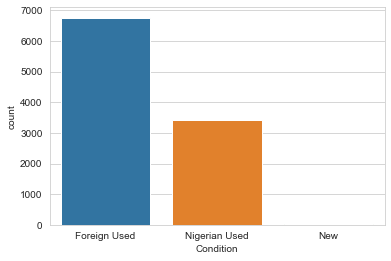

In [111]:
#A countplot showing the graphical representaion of the frequency of all car conditions
sns.countplot(x="Condition", data=cars_df)

In [112]:
# Mean value of the numerical values
cars_df.groupby(['Condition']).mean()

,Mileage,Year,Price
Condition,,,
Foreign Used,138700.702131,2010.621486,8.111984e+06
New,37340.833333,2015.833333,2.210975e+07
Nigerian Used,149055.133936,2002.568427,4.771897e+06


[(1990.0, 2021.0)]

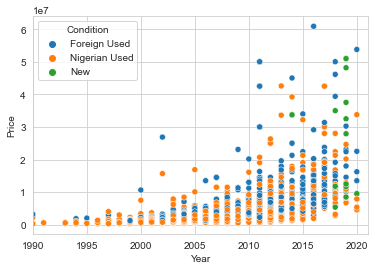

In [113]:
# Graphical representation of price distribution as respect to the model
sns.set_style("whitegrid")
ax = sns.scatterplot(x="Year", y="Price", data=cars_df, hue="Condition")
ax.set(xlim=(1990, 2021))

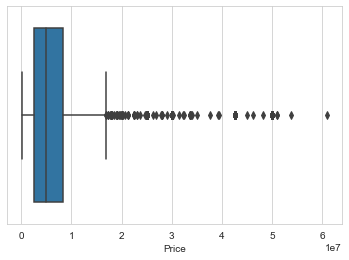

In [114]:
#Box plot showing how the prices in the data are spread out
sns.set_style("whitegrid")
ax = sns.boxplot(x="Price", data=cars_df)

In [115]:
# show distinct years 
cars_df['Year'].value_counts()

2013    1403
2012    1206
2010     969
2008     768
2011     727
2007     718
2006     626
2009     519
2015     468
2016     429
2004     425
2005     411
2014     288
2003     264
2002     197
2017     165
2018     160
2001     120
2000     100
1999      87
1998      44
2019      29
1997      25
2020      12
1996      11
1994      10
0          9
1995       9
1990       5
1993       4
1991       1
Name: Year, dtype: int64

> ## From the above, we can see that (0) is present in the years value which is not acceptable, Therefore, we drop the rows with year value (0).

In [116]:
#convert the locally used to nigerian used as local in this context refers to Nigeria
cars_df = cars_df.drop(cars_df[cars_df['Year'] == '0'], inplace = True)

KeyError: "['car_name' 'model' 'Mileage' 'Year' 'Condition' 'Price'] not found in axis"

In [93]:
# show distinct years 
cars_df['Year'].value_counts()

KeyError: 'Year'

In [61]:
sns.set_style("whitegrid")
ax = sns.scatterplot(x="Condition", y="Price", data=cars_df)

ValueError: Could not interpret value `Condition` for parameter `x`

In [111]:
df2= cars_df.drop(cars_df[cars_df['Price'] > 16000000].index)

In [25]:
df2.shape

(9642, 5)

In [26]:
cars_df.shape

(10213, 5)

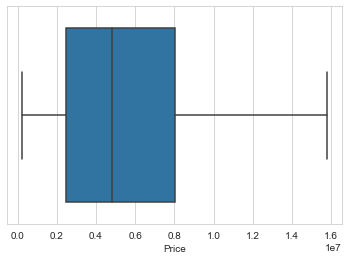

In [27]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="Price", data=df2)

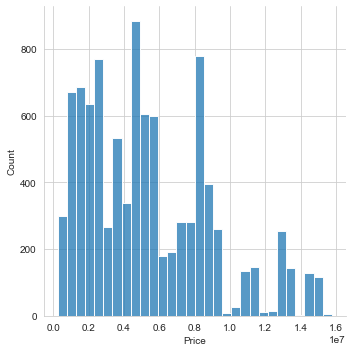

In [28]:
sns.set_style("whitegrid")
ax = sns.displot(x="Price", data=df2)